In [1]:
import pandas as pd  # pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##  Random Forest
példa:https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu

Csak numerikus targetváltozók

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn import metrics
from sklearn.metrics import log_loss
from operator import itemgetter


/var/local/conda/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
df_train = pd.read_csv("../datasets/train1_50labels_withdaytimes_app60000.csv", sep=",")
#df_train = df_train.set_index("device_id")
#df_train.drop(columns=["Unnamed: 0"], inplace=True)
df_train.head(1)

,Unnamed: 0,device_id,events_num,min_timestamp,max_timestamp,latitude_events_median,longitude_events_median,events_per_day,label_548,label_i_548,...,app_9136721329817567486,app_-2145434552412465677,app_6868430133575209713,app_5824972015480403938,gender,age,group,phone_brand,device_model,phone_brand_eng
0,0,-8076087639492063270,0,NaN,NaN,NaN,NaN,NaN,0,0,...,0,0,0,0,M,35,M32-38,小米,MI 2,Xiaomi


In [4]:
# factorize
factor = pd.factorize(df_train['group'])
df_train.group = factor[0]
definitions = factor[1]
factor = pd.factorize(df_train['phone_brand_eng'])
df_train.phone_brand_eng = factor[0]
definitions_phone_brand_eng = factor[1]
factor = pd.factorize(df_train['device_model'])
df_train.device_model = factor[0]
definitions_device_model = factor[1]


In [5]:
df_train_events=df_train[df_train["events_num"] > 0]
df_train_noevents=df_train[df_train["events_num"] == 0][["device_id", "phone_brand_eng", "device_model", "group"]]
df_train_noevents.head(1)

,device_id,phone_brand_eng,device_model,group
0,-8076087639492063270,0,0,0


In [6]:
df_train_noevents

,device_id,phone_brand_eng,device_model,group
0,-8076087639492063270,0,0,0
1,-2897161552818060146,0,0,0
3,-4938849341048082022,0,1,1
4,245133531816851882,0,2,1
5,-1297074871525174196,1,3,2
...,...,...,...,...
74637,-3539330294838027409,24,596,6
74639,-4752726726975186730,4,9,6
74640,4682031842235089751,0,2,1
74641,-9178703742877135986,0,2,1


In [7]:

## TODO : nan, infiniti -> 0
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train.fillna(0, inplace=True)

df_train_events.replace([np.inf, -np.inf], np.nan, inplace=True)
df_train_events.fillna(0, inplace=True)

/var/local/conda/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/var/local/conda/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
df_train_noevents.count()

device_id          51355
phone_brand_eng    51355
device_model       51355
group              51355
dtype: int64

In [9]:
df_train_events.count()

Unnamed: 0         23290
device_id          23290
events_num         23290
min_timestamp      23290
max_timestamp      23290
                   ...  
age                23290
group              23290
phone_brand        23290
device_model       23290
phone_brand_eng    23290
Length: 217, dtype: int64

In [10]:
def doRandomForest(df_train, magyarazo_valtozok1, nestimators = 400):

    
    X_train, X_test, y_train, y_test = train_test_split(df_train[magyarazo_valtozok1], df_train['group'], test_size=0.1,random_state=109) # 90% training and 10% test

    scaler = StandardScaler()
    X_traintrans = scaler.fit_transform(X_train)
    X_testtrans = scaler.transform(X_test)
    
    # Fitting Random Forest Classification to the Training set
    classifier = RandomForestClassifier(n_estimators = nestimators, criterion = 'entropy', random_state = 42)
    classifier.fit(X_traintrans, y_train)
    y_pred = classifier.predict_proba(X_testtrans)
    
    feature_importances = pd.DataFrame(classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
    score = log_loss(y_test.tolist(), y_pred)
    p = metrics.accuracy_score(y_test, np.argmax(y_pred, axis=1))
    #p = metrics.accuracy_score(y_test, y_pred)


    return feature_importances, score, p



In [11]:
magyarazo_valtozok_app_label = []
for m in df_train.columns:
    if m not in ['Unnamed: 0', 'device_id', 'min_timestamp', 'max_timestamp','gender', 'age', 'group', 'phone_brand' ]:
        magyarazo_valtozok_app_label += [m]
        
magyarazo_valtozok_app = []
for m in df_train.columns:
    if m not in ['Unnamed: 0', 'device_id', 'min_timestamp', 'max_timestamp','gender', 'age', 'group', 'phone_brand' ]:
        if m.startswith("label_"):
            continue
        magyarazo_valtozok_app += [m]

magyarazo_valtozok_label = []
for m in df_train.columns:
    if m not in ['Unnamed: 0', 'device_id', 'min_timestamp', 'max_timestamp','gender', 'age', 'group', 'phone_brand' ]:
        if m.startswith("app_"):
            continue
        magyarazo_valtozok_label += [m]

magyarazo_valtozok_nolabel_noapp = []
for m in df_train.columns:
    if m not in ['Unnamed: 0', 'device_id', 'min_timestamp', 'max_timestamp','gender', 'age', 'group', 'phone_brand' ]:
        if m.startswith("app_"):
            continue
        if m.startswith("label_"):
            continue            
        magyarazo_valtozok_nolabel_noapp += [m]

        
magyarazo_valtozok_no_events = []
for m in df_train_noevents.columns:
    if m not in ['Unnamed: 0', 'device_id', 'min_timestamp', 'max_timestamp','gender', 'age', 'group', 'phone_brand' ]:
        magyarazo_valtozok_no_events += [m]

In [12]:
results={}
#results["NoEvent"] = (doRandomForest(df_train_noevents, magyarazo_valtozok_no_events))
#stop

In [13]:
results={}
results["NoEvent, Event - Label:yes, App:yes"] = (doRandomForest(df_train, magyarazo_valtozok_app_label))
results["NoEvent, Event - Label:no, App:yes"] = (doRandomForest(df_train, magyarazo_valtozok_app))
results["NoEvent, Event - Label:yes, App:no"] = (doRandomForest(df_train, magyarazo_valtozok_label))
results["NoEvent, Event - Label:no, App:no"] = (doRandomForest(df_train, magyarazo_valtozok_nolabel_noapp))
results["Event - Label:yes, App:yes"] = (doRandomForest(df_train_events, magyarazo_valtozok_app_label))
results["Event - Label:no, App:yes"] = (doRandomForest(df_train_events, magyarazo_valtozok_app))
results["Event - Label:yes, App:no"] = (doRandomForest(df_train_events, magyarazo_valtozok_label))
results["Event - Label:no, App:no"] = (doRandomForest(df_train_events, magyarazo_valtozok_nolabel_noapp))
results["NoEvent"] = (doRandomForest(df_train_noevents, magyarazo_valtozok_no_events))

NoEvent, Event - Label:yes, App:yes - Log loss: 3.215377, Accuary:0.172405
NoEvent, Event - Label:no, App:yes - Log loss: 3.239731, Accuary:0.172672
NoEvent, Event - Label:yes, App:no - Log loss: 3.228151, Accuary:0.167180
NoEvent, Event - Label:no, App:no - Log loss: 3.466657, Accuary:0.147890
Event - Label:yes, App:yes - Log loss: 2.263770, Accuary:0.212538
Event - Label:no, App:yes - Log loss: 2.240145, Accuary:0.212967
Event - Label:yes, App:no - Log loss: 2.296174, Accuary:0.185487
Event - Label:no, App:no - Log loss: 3.265960, Accuary:0.133104
NoEvent - Log loss: 3.593488, Accuary:0.151674


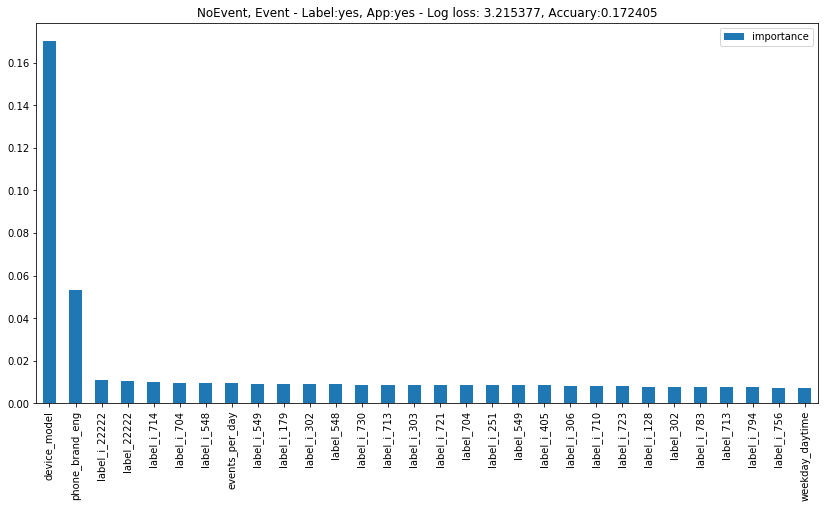

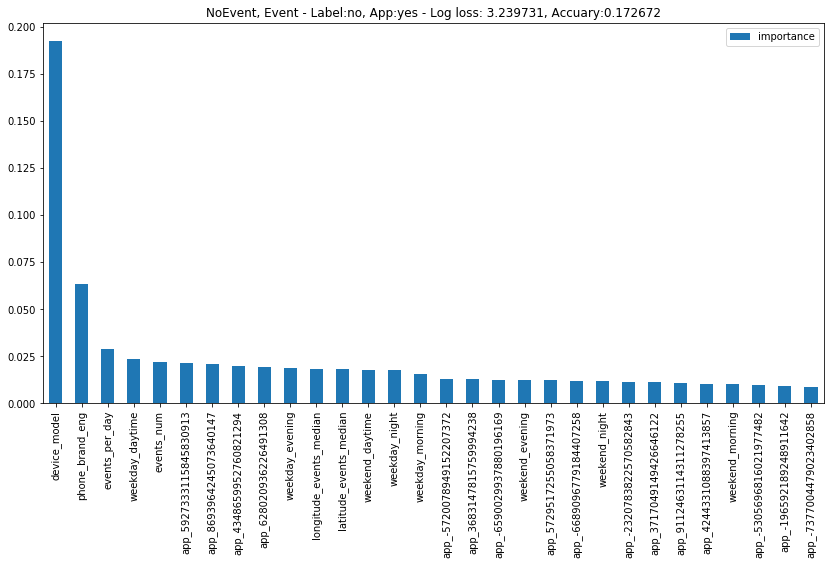

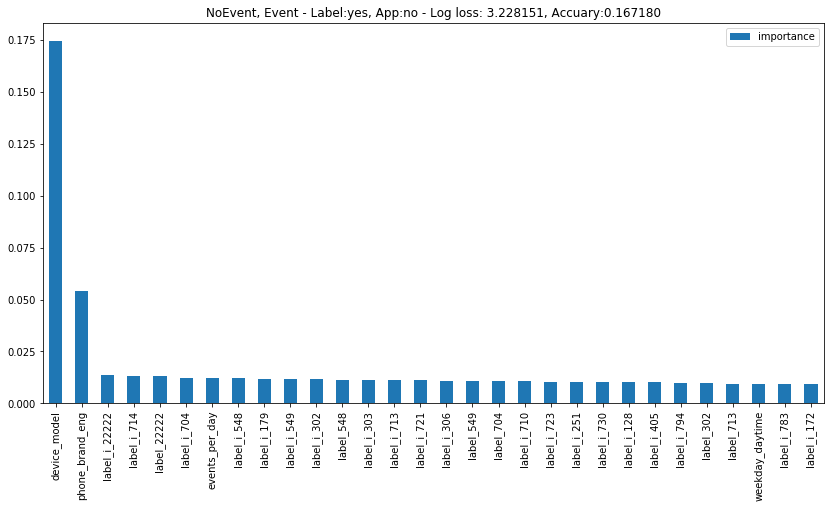

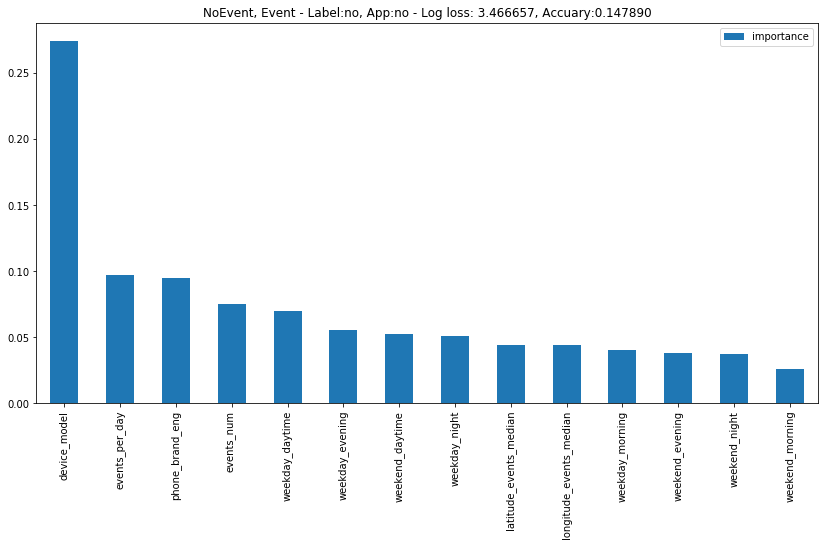

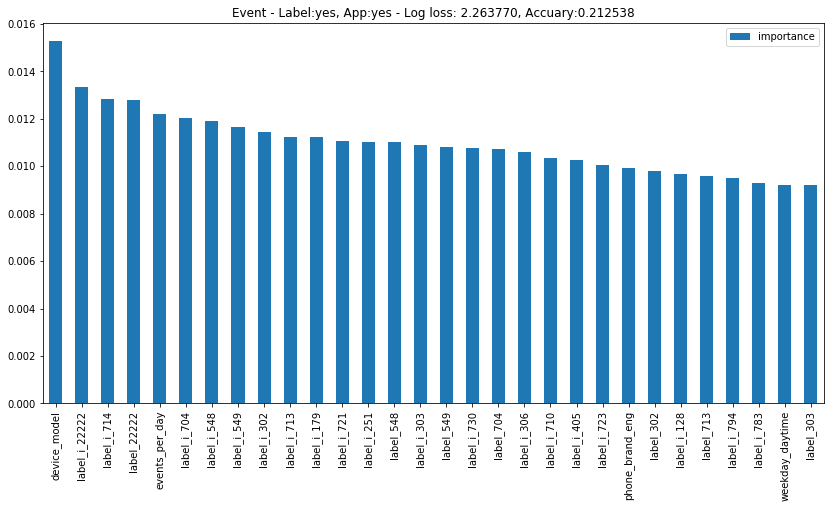

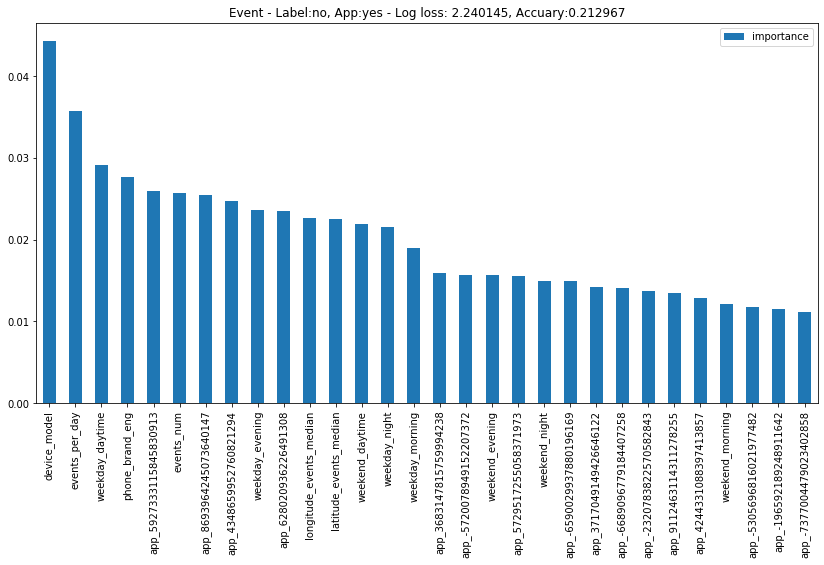

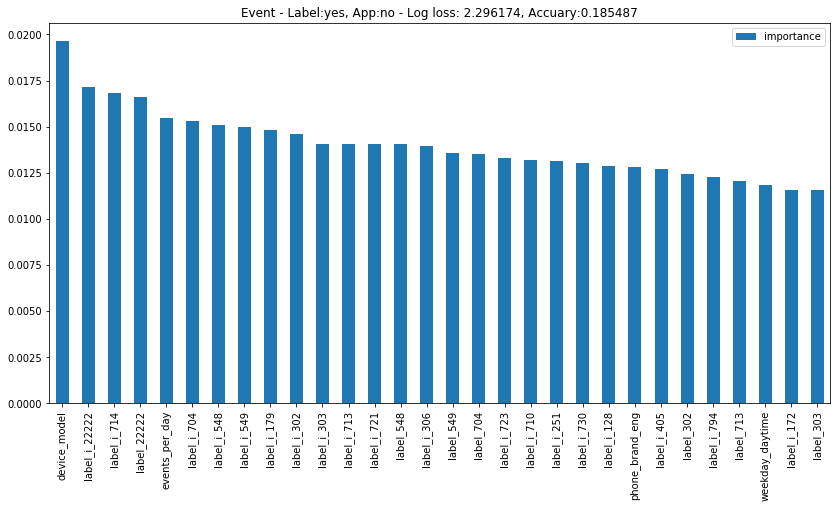

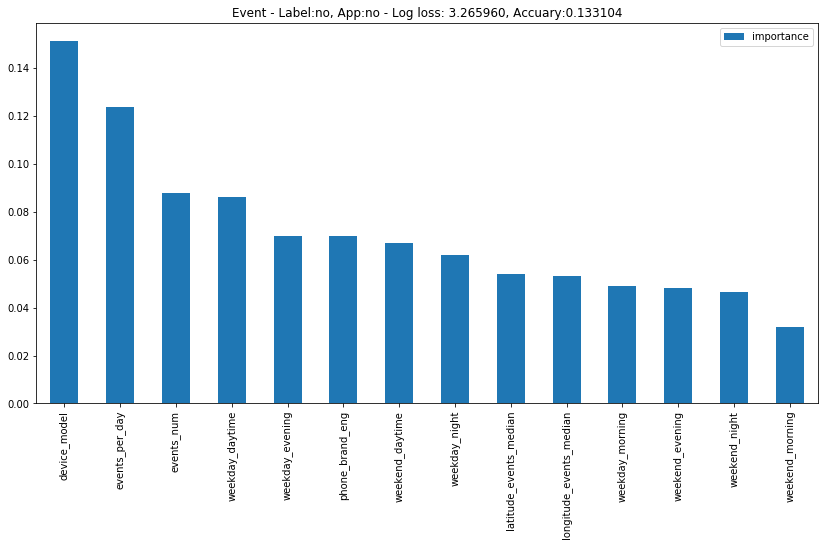

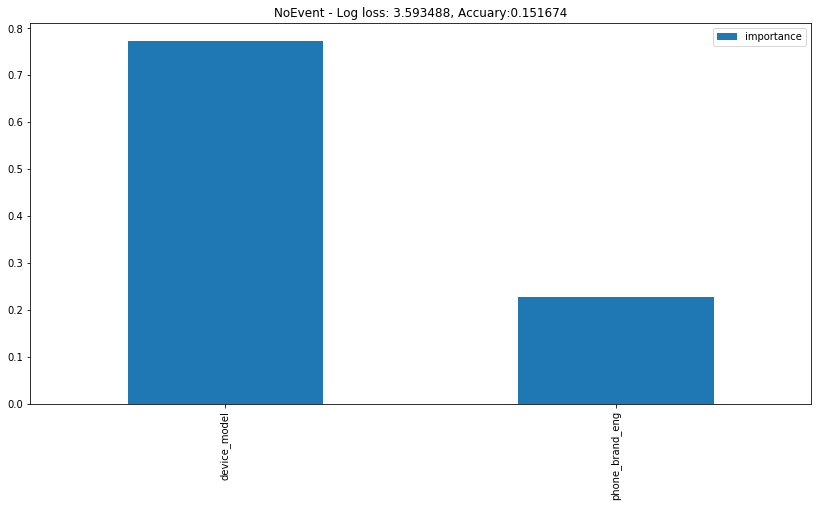

In [16]:

for i in results:
    print("%s - Log loss: %f, Accuary:%f"%(i, results[i][1], results[i][2]))
    importance = results[i][0][:30]
    # Plot the feature importances of the forest
    df1 = pd.DataFrame(importance)
    #df1.rename(columns={0:"feature", 1:"cou"}, inplace=True)
    #df1=df1.set_index("feature")
    df1.plot.bar(title="%s - Log loss: %f, Accuary:%f"%(i,results[i][1], results[i][2]), figsize=(14, 7))